# Fashin mnist

## import modules and load data

In [1]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

y_train label 값, 0은 T-Shirt

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

0


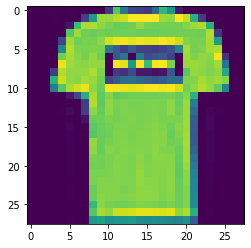

In [3]:
import matplotlib.pyplot as plt
print(y_train[1])
plt.imshow(x_train[1])

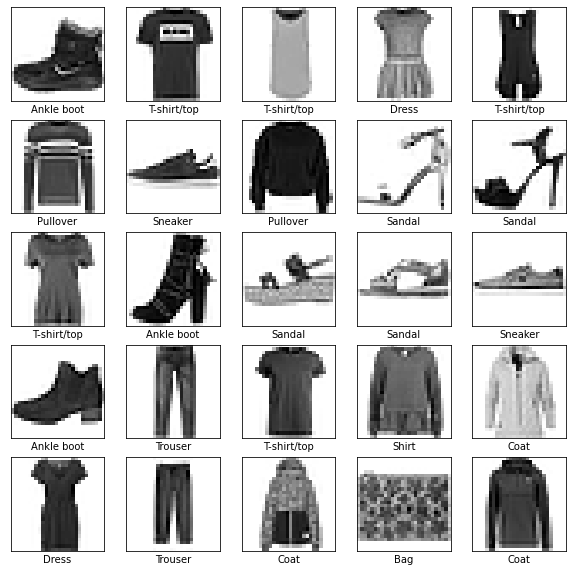

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Reshape and one-hot encoding

In [6]:
# 2차원 형태로 변환
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
print(x_train.shape, x_test.shape)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


## Normalization

In [7]:
# normalization. why? 학습이 잘 됨
x_train = x_train / 255.
x_test = x_test / 255.

## Model

In [8]:
X = tf.keras.layers.Input(shape=(784, ))
H = tf.keras.layers.Dense(512, activation=tf.keras.activations.elu)(X)
H = tf.keras.layers.Dense(128, activation=tf.keras.activations.elu)(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)

# model.compile(
#     loss="categorical_crossentropy", 
#     optimizer="adam",
#     metrics=["accuracy"],
# )

model.compile(
    loss=tf.keras.losses.categorical_crossentropy, # 훈련하는 동안 모델의 오차 측정
    optimizer=tf.keras.optimizers.Adam(0.001), # 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법 결정
    metrics=[tf.keras.metrics.categorical_accuracy] # 훈련 단계와 테스트 단계를 모니터링 하기 위함
)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [9]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## Fit

In [10]:
H = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.5169 - categorical_accuracy: 0.8143 - val_loss: 0.4119 - val_categorical_accuracy: 0.8511
Epoch 2/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3829 - categorical_accuracy: 0.8608 - val_loss: 0.3594 - val_categorical_accuracy: 0.8670
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3489 - categorical_accuracy: 0.8715 - val_loss: 0.3704 - val_categorical_accuracy: 0.8622
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3210 - categorical_accuracy: 0.8804 - val_loss: 0.3478 - val_categorical_accuracy: 0.8714
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.3005 - categorical_accuracy: 0.8890 - val_loss: 0.3235 - val_categorical_accuracy: 0.8839
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.2863 - categorical_accuracy: 0.8951 - val_loss: 0.3191 - val_categorical_accuracy: 0.8837
Epo

## Evaluation

In [11]:
results = model.evaluate(x_test, y_test)
print(model.metrics_names)     # 모델의 평가 지표 이름
print(results)                 # 모델 평가 지표의 결과값

313/313 [==============================] - 2s 8ms/step - loss: 0.3419 - categorical_accuracy: 0.8792
['loss', 'categorical_accuracy']
[0.3418503701686859, 0.8791999816894531]


In [12]:
def draw_plot(H):
    import matplotlib.pyplot as plt
    plt.style.use("ggplot")

    fig, loss_ax = plt.subplots(figsize=(10, 5))
    acc_ax = loss_ax.twinx()

    loss_ax.plot(H.history['loss'], 'tomato', label='train loss')
    loss_ax.plot(H.history['val_loss'], 'r', label='val loss')
    loss_ax.set_ylim(0., 1.0)
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')

    acc_ax.plot(H.history['categorical_accuracy'], 'c', label='train acc')
    acc_ax.plot(H.history['val_categorical_accuracy'], 'b', label='val acc')
    acc_ax.set_ylim(0., 1.0)
    acc_ax.set_ylabel('accuracy')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower right')

    plt.show()

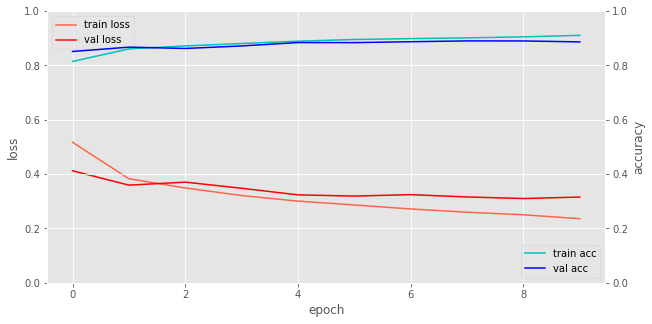

In [13]:
draw_plot(H)

## Predict

In [14]:
predictions = model.predict(x_test)

In [15]:
predictions[0]

array([6.8129529e-09, 1.6944847e-07, 1.5410496e-08, 4.5797034e-08,
       2.1321387e-07, 4.9207464e-04, 5.2007925e-07, 1.4477528e-02,
       7.9147839e-08, 9.8502928e-01], dtype=float32)

In [18]:
np.argmax(predictions[0]), y_test[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))